In [1]:
from liebTB import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

# Lieb lattice with 65 sites

In [3]:
n1, n2 = 5, 5
lat = liebTB()
lat.get_lattice(n1=n1, n2=n2)
lat.remove_dangling()

## Uniform hoppings

In [4]:
sys = liebEig(lat)
plot = plotTB(sys)
t = 1.
t_nn = 0.5
sys.set_hopping([{'n': 1, 't': t}, {'n': 2, 't': t_nn}])

## Alternating hoppings

In [38]:
sys = liebEig(lat)
plot = plotTB(sys)
t_ab, t_ba = np.round(4/3, 2), np.round(2/3, 2)
t_ac, t_ca = t_ab, t_ba
t_pm, t_pp, t_mm, t_mp = 0.8, 0.4, 0.4, 0.2
sys.set_nearest_neighbor_hop(t_ab=t_ab, t_ba=t_ba, t_ac=t_ac, t_ca=t_ca)
sys.set_next_nearest_neighbor_hop(t_pp=t_pp, t_pm=t_pm, t_mp=t_mp ,t_mm=t_mm)

ab 1.33 ba 0.67 ac 1.33 ca 0.67
next_nearest hoppings
t++ 0.4 t-- 0.4 t+- 0.8 t-+ 0.2


### Dimerization defect line along x

In [39]:
sys.set_defect_dimer_x(4)

### Dimerization defect line along  y

In [40]:
sys.set_defect_dimer_y(4)

### Disorder

In [5]:
alpha = 0.1

Generic disorder

In [6]:
sys.set_disorder_generic(alpha)

Pair disorder

In [16]:
sys.set_disorder_pair(alpha)

Placket disorder

In [30]:
sys.set_disorder_placket(alpha)

## Solve eigenvalues problem

In [41]:
sys.get_ham(complex_transpose=True)
sys.get_eig(eigenvec=True)
zero_mode = sys.get_intensity_pola(tag_pola=b'a')

State with polarization: [ 1.]


/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/figure.py:1718: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


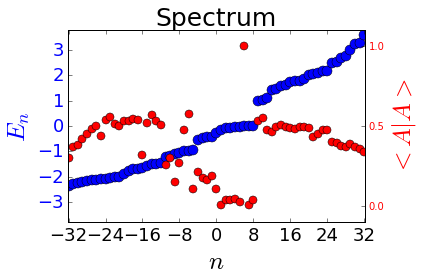

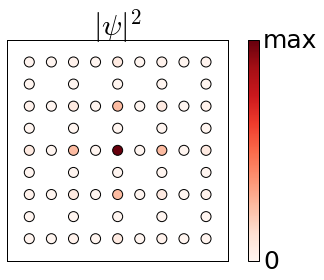

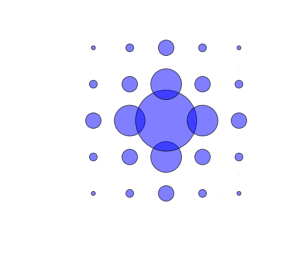

In [42]:
s = 100
fig_spectrum = plot.spectrum(tag_pola=b'a', fs=25)
fig_zero_mode = plot.intensity_disk(zero_mode, s=s, fs=25)
fig_zero_mode = plot.intensity_area(zero_mode, s=s, fs=25)

In [43]:
#sys.hop['t'] = 2*np.exp(-sys.hop['t'])
alpha = 0
sys.get_coor_hop()
fig_coor_real = plot.lattice_hop(ms=12)

RuntimeError: maximum recursion depth exceeded

In [49]:
from collections import OrderedDict
save = saveTB(sys=sys, params=OrderedDict([('ta', t_ab), ('tb', t_ba), ('tc', t_ca), ('td', t_ca)]), 
              dir_name='lieb_supp', ext='pdf')
save.fig(fig_zero_mode, 'zero_modeXY')
save.fig(fig_spectrum, 'spectrumXY')
save.fig(fig_coor_real, 'lattice_realXY')

In [26]:
from collections import OrderedDict
save = saveTB(sys=sys, params=OrderedDict([('ta', t_ab), ('tb', t_ba), ('tc', t_ca), ('td', t_ca)]), 
              dir_name='lieb_supp', ext='pdf')
save.fig(fig_zero_mode, 'zero_mode')
save.fig(fig_spectrum, 'spectrum')
save.fig(fig_coor_real, 'lattice_real')

In [35]:
from collections import OrderedDict
save = saveTB(sys=sys, params=OrderedDict([('ta', t_ab), ('tb', t_ba), ('tc', t_ca), ('td', t_ca)]), 
              dir_name='lieb_supp', ext='pdf')
save.fig(fig_zero_mode, 'zero_modeX')
save.fig(fig_spectrum, 'spectrumX')
save.fig(fig_coor_real, 'lattice_realX')

In [45]:
from collections import OrderedDict
save = saveTB(sys=sys, params=OrderedDict([('ta', t_ab), ('tb', t_ba), ('tc', t_ca), ('td', t_ca)]), 
              dir_name='lieb_supp', ext='pdf')
save.fig(fig_zero_mode, 'zero_modeXY')
save.fig(fig_spectrum, 'spectrumXY')
save.fig(fig_coor_real, 'lattice_realXY')

## Charge Fractionization

In [50]:
sys = liebEig(lat)
plot = plotTB(sys)
t_ab, t_ba = np.round(4/3, 2), np.round(2/3, 2)
t_ac, t_ca = t_ab, t_ba
c = 0.01 # nnn strength
sys.set_nearest_neighbor_hop(t_ab=t_ab, t_ba=t_ba, t_ac=t_ac, t_ca=t_ca)
sys.set_next_nearest_neighbor_hop(c=c)
sys.set_defect_dimer_x(4)
sys.set_defect_dimer_y(4)

ab 1.33 ba 0.67 ac 1.33 ca 0.67
next_nearest hoppings
t++ 0.0141421356237 t-- 0.0141421356237 t+- 0.0115758369028 t-+ 0.0163095064303


In [51]:
sys.get_ham(complex_transpose=True)
sys.get_eig(eigenvec=True)
zero_mode = sys.get_state_pola(tag_pola=b'a')

State with polarization: [ 1.]


24 states between -4 and -0.1
17 states between -0.1 and 0.0005
State with polarization: [ 1.]
0.500793956699 0.267661724044
0.461253131096 3.27285239327e-06
0.373463437253
0.500801525189


/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/figure.py:1718: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


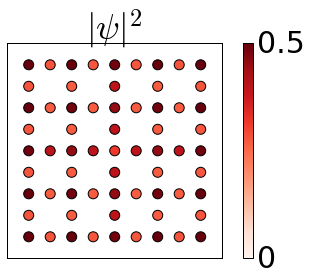

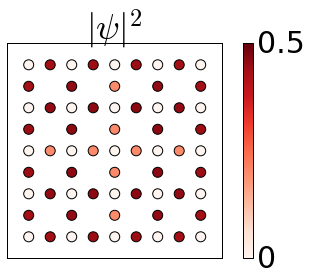

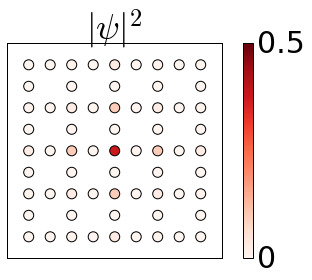

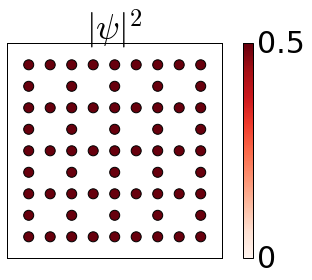

In [52]:
states_neg = sys.get_states_en(en_lims=[-4, -0.1])
states_flatband = sys.get_states_en(en_lims=[-0.1, 5e-4])
zero_mode = sys.get_state_pola(tag_pola=b'a')
states_flatband -= zero_mode
fig_neg = plot.intensity(states_neg, s=s, lims=[0, .5], fs=30)
fig_fb = plot.intensity(states_flatband, s=s, lims=[0, .5], fs=30)
fig_zm = plot.intensity(zero_mode, s=s, lims=[0, .5], fs=30)
fig_sum = plot.intensity(states_neg+.5*states_flatband+.5*zero_mode, s=s, lims=[0, .5], fs=30)
print(np.max(states_neg), np.min(states_neg))
print(np.max(states_flatband), np.min(states_flatband))
print(np.max(zero_mode))
print(np.max(states_neg+.5*states_flatband))

In [54]:
from collections import OrderedDict
save = saveTB(sys=sys, params=OrderedDict([('ta', t_ab), ('tb', t_ba), ('tc', t_ca), ('td', t_ca)]), 
                   dir_name='lieb_supp', ext='pdf')
save.fig(fig_zm, 'intensity_zero_mode')
save.fig(fig_fb, 'intensity_flat')
save.fig(fig_neg, 'intensity_neg')
save.fig(fig_sum, 'intensity_sum')

ab 2 ba 1 ac 2 ca 1
next_nearest hoppings
t++ 0.866025403784 t-- 0.866025403784 t+- 0.707106781187 t-+ 1.0


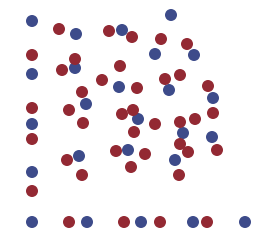

In [160]:
sys = liebEig(lat)
plot = plotTB(sys)
t_ab, t_ba = np.round(4/3, 2), np.round(2/3, 2)
t_ac, t_ca = t_ab, t_ba
t_ab, t_ba = 2, 1
t_ac, t_ca = 2, 1
c = .5 # nnn strength
sys.set_nearest_neighbor_hop(t_ab=t_ab, t_ba=t_ba, t_ac=t_ac, t_ca=t_ca)
sys.set_next_nearest_neighbor_hop(c=c)


alpha = 0.5
sys.set_defect_dimer_x(4)
sys.set_defect_dimer_y(4)
sys.set_disorder_placket(alpha)

if alpha == 0.:
    sys.get_coor_hop()
else:
    sys.get_coor_hop_dis()
fig_coor_real = plot.lattice_hop(ms=12)